<a href="https://colab.research.google.com/github/ana-mikaC/Satellite-Data-Analyses/blob/main/Copy_of_Anamika_Chakrabarty_Simulated_Disk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anamika chakrabarty, ICESat-2 Altimetry O-AL**

# Andromeda, here we come!
Simulating the disk of Andromeda!



#Setup Google Drive access for data input and output




In [ ]:
# Step 1 - Mounting the Google Drive. User will need to give access to their
#          Google drive for reading/writing data
from google.colab import drive
drive.mount('/content/drive')
# import the os.path package for path name construction
from os import path as path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Prepare for Python module import



In [ ]:
# here is the standard path if your placed the sip_program folder as directed
py_dir = '/content/drive/MyDrive/sip_program'
#py_dir = '' # If needed, uncomment and paste your path here.
print("My path to the sip_program folder is {}".format(py_dir))

My path to the sip_program folder is /content/drive/MyDrive/sip_program


## Import a stand-alone Python file



1.  First, we import a standard Python module named *sys*.
2.  Next, we use a special command to inform Python where to look for the stand-alone *fakedisk* Python program in order to use it as a package in our code.
3.  Finally, we import fakedisk as a Python module.


  



In [ ]:
import sys
sys.path.insert(0, py_dir)
from fakedisk import fakedisk


Importing the other key programs. *matplotlib* and *numpy* should be familar to you at this point.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The following routine makes a plot of the simulated disk.

In [ ]:
def show_map(sim, quantity, label, vmin=-200, vmax=200, cutout=False):
    ax = plt.axes(aspect = 'equal')

    ax.set_xlabel('xi (kpc)')
    ax.set_ylabel('eta (kpc)')
    ax.set_title('Simulation')
    ax.set_xlim(1.2 * max(sim.x), 1.2 * min(sim.x))

    if cutout:
        #clip into "mystery cutout"
        sideL  = 0.25 * sim.scaleFactor
        ax.set_xlim(sideL, -sideL)
        ax.set_ylim(-sideL, sideL)

    tt = ax.scatter(sim.x, sim.z, c=quantity, edgecolors='none', s=2, vmin=vmin, vmax=vmax)

    plt.colorbar(tt, label = label)

Create our fake disk!

In [ ]:
scale_factor = 20. #Scale length of the disk
dispersion = 50.    #Dispersion in the layer
incl=77. #Inclination 0 = face- on, 90 is edge on (will implode)
pa0=-37.7 #Position Angle measured from vertical counter-clockwise
vrot=200. #rotation velocity, one half- approaching, one half going away (higher vel on one side)
#center has 0 velocity, but whole galaxy is spinnng towards us, model not representatibe
n=10000 #number of particles
new_sim = fakedisk(N=n, incl=incl, pa0=pa0, v=vrot, scaleFactor=scale_factor, shape='constant',
               dispersion=dispersion)

## Generate plots of  simulated velocity field below.


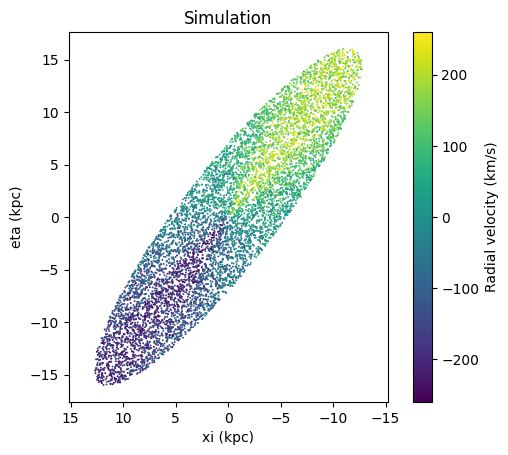

In [ ]:
#Generate velocity map
vmax = 1.3 * new_sim.vrot
show_map(new_sim, new_sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax)
#yellows and green (pos means away)

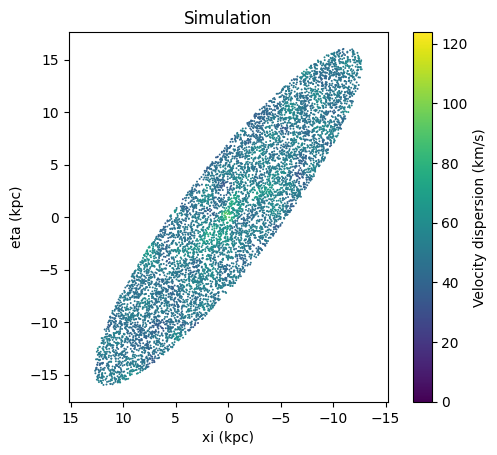

In [ ]:
#Generate dispersion map using 200'' smoothing circle.
arcsec2kpc = (13.67/3600.) #conversion factor
sigma = np.zeros(len(new_sim.x)) #an array of zeroes that will contain velocity dispersion
sig_sv = np.zeros(len(new_sim.x))
smoothingCircle = 200. * arcsec2kpc
for i in range(len(sigma)):
    sigma[i], sig_sv[i] = new_sim.get_sv(i, smoothingCircle)
show_map(new_sim, sigma, 'Velocity dispersion (km/s)', vmin=0, vmax=1.3*np.max(sigma))

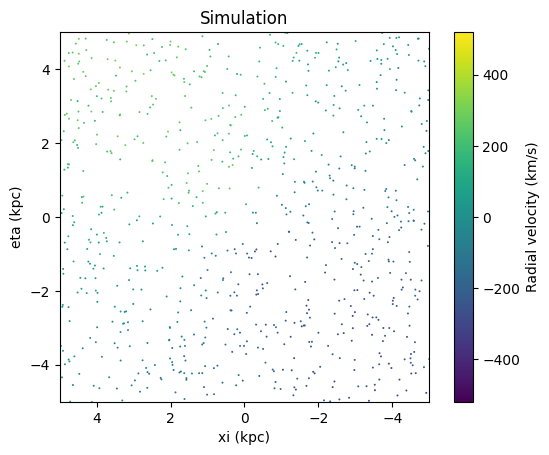

In [ ]:
#Also generate a little square cutout velocity map.
vmax = 1.3 * new_sim.vrot
show_map(new_sim, new_sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax, cutout=True)

# Project I did based off tutorial by Prof. Raja GuhaThakurta of UCSC and the Science Internship Program for the NASA SEES AdvancesPython Courses
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](https://sip.ucsc.edu/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2023 SEES.   